In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [25]:
url = "https://portal.edirepository.org/nis/dataviewer?packageid=knb-lter-hfr.71.23&entityid=ab0fe2bf4f3ad850371ccb9c69d78469"

df = pd.read_csv(url, parse_dates = ['start.date', 'end.date'])

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   code        105 non-null    object        
 1   start.date  105 non-null    datetime64[ns]
 2   end.date    105 non-null    datetime64[ns]
 3   number      105 non-null    int64         
 4   name        33 non-null     object        
 5   ss          105 non-null    int64         
 6   track       105 non-null    object        
 7   rf.max      105 non-null    object        
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 6.7+ KB


In [20]:
df.describe()

,number,ss
count,105.000000,105.000000
mean,5.647619,1.961905
std,3.833007,1.091257
min,1.000000,1.000000
25%,3.000000,1.000000
50%,4.000000,2.000000
75%,8.000000,3.000000
max,17.000000,5.000000


In [21]:
df.nunique()

code          105
start.date    105
end.date      105
number         15
name           32
ss              5
track           5
rf.max          5
dtype: int64

In [22]:
[df['ss'].unique(),
df['track'].unique(),
df['rf.max'].unique()]

[array([2, 1, 3, 4, 5]),
 array(['O', 'N', 'S', 'N*', 'W'], dtype=object),
 array(['F1', 'Nd', 'F2', 'F0', 'F3'], dtype=object)]

In [23]:
df.head()

,code,start.date,end.date,number,name,ss,track,rf.max
0,Y1852,1852-10-07,1852-10-08,5,NaN,2,O,F1
1,Y1857,1857-09-28,1857-09-28,4,NaN,2,N,F1
2,Y1861,1861-08-17,1861-08-17,2,NaN,1,O,Nd
3,Y1864,1864-08-31,1864-08-31,3,NaN,1,S,F1
4,Y1865,1865-09-11,1865-09-11,4,NaN,2,O,F1


In [29]:
df.columns = (df.columns
               .str.replace('.','_')
                )

/tmp/ipykernel_1852258/1702784916.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns = (df.columns


In [31]:
df['duration'] = df['end_date'] - df['start_date']

In [32]:
df

,code,start_date,end_date,number,name,ss,track,rf_max,duration
0,Y1852,1852-10-07,1852-10-08,5,NaN,2,O,F1,1 days
1,Y1857,1857-09-28,1857-09-28,4,NaN,2,N,F1,0 days
2,Y1861,1861-08-17,1861-08-17,2,NaN,1,O,Nd,0 days
3,Y1864,1864-08-31,1864-08-31,3,NaN,1,S,F1,0 days
4,Y1865,1865-09-11,1865-09-11,4,NaN,2,O,F1,0 days
...,...,...,...,...,...,...,...,...,...
100,Y1995a,1995-10-01,1995-10-03,15,Opal,1,N*,F0,2 days
101,Y1995b,1995-10-10,1995-10-16,17,Roxanne,3,N,F2,6 days
102,Y1996,1996-08-20,1996-08-20,4,Dolly,1,N,F1,0 days
103,Y1998,1998-10-27,1998-10-28,13,Mitch,5,S,F1,1 days


In [33]:
df_5 = df[df['ss'] == 5]
df_5

,code,start_date,end_date,number,name,ss,track,rf_max,duration
76,Y1955b,1955-09-28,1955-09-28,10,Janet,5,N,F3,0 days
96,Y1980a,1980-08-07,1980-08-08,1,Allen,5,O,F3,1 days
98,Y1988,1988-09-14,1988-09-15,8,Gilbert,5,N,F3,1 days
103,Y1998,1998-10-27,1998-10-28,13,Mitch,5,S,F1,1 days


In [40]:
df_5.drop(['code', 'start_date', 'end_date', 'number', 'track', 'rf_max'], axis = 1)

,name,ss,duration
76,Janet,5,0 days
96,Allen,5,1 days
98,Gilbert,5,1 days
103,Mitch,5,1 days


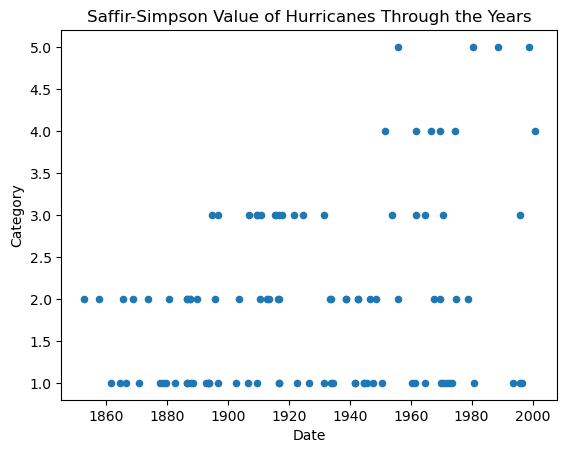

In [45]:
ax = df.plot.scatter(x = 'start_date',
                    y = 'ss',
                    ylabel = 'Category',
                    xlabel = 'Date',
                    title = "Saffir-Simpson Value of Hurricanes Through the Years")

Text(0, 0.5, 'Category')

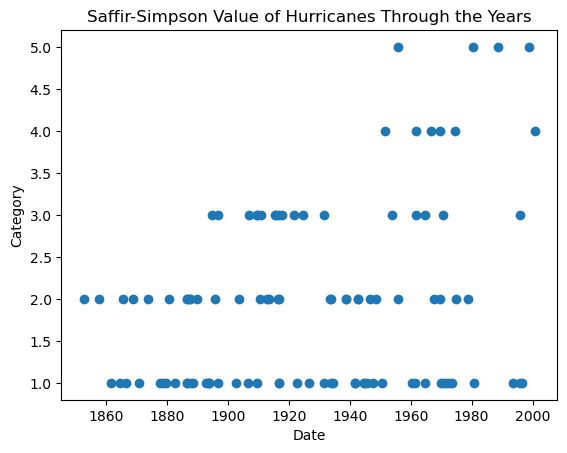

In [56]:
plt.scatter(data = df,x = 'start_date', y = 'ss')
plt.title("Saffir-Simpson Value of Hurricanes Through the Years")
plt.xlabel('Date')
plt.ylabel('Category')